**Objective:**

A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

You are the best data scientist in Greenland and they've hired you to solve this problem.Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

In [ ]:
# importing packages
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns # to visualise

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Loading the dataset
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

# Let's have a look at what our data is like


In [ ]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [ ]:
pharma_data.shape

(23097, 18)

In [ ]:
pharma_data.head(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
7,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
8,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
9,1647,17,10190,DX6,46,17.663877,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [ ]:
pharma_data.tail(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
23087,4527,24,7809,DX2 DX5,31,27.588608,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23088,27360,25,9522,DX6,31,24.094697,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23089,15173,46,8795,DX6,58,21.723167,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23090,24072,40,8029,DX6,10,20.791583,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23091,701,14,572,DX6,10,27.820924,NO,URBAN,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
23096,3947,21,6266,DX6,50,18.391156,YES,RURAL,Stable,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,0


In [ ]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [ ]:
#find unique value
pharma_data.nunique()

ID_Patient_Care_Situation    23097
Diagnosed_Condition             53
Patient_ID                   10570
Treated_with_drugs              32
Patient_Age                     78
Patient_Body_Mass_Index      10570
Patient_Smoker                   3
Patient_Rural_Urban              2
Patient_mental_condition         1
A                                2
B                                2
C                                2
D                                2
E                                2
F                                2
Z                                2
Number_of_prev_cond              5
Survived_1_year                  2
dtype: int64

# Checking if there is any missing data 

In [ ]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

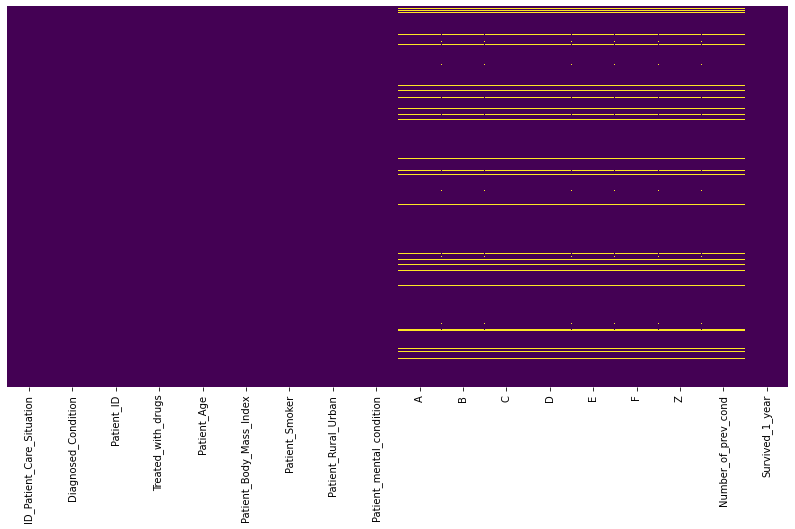

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(pharma_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# To get percentage of missing data in each column
pharma_data.isnull().sum() / len(pharma_data) * 100

ID_Patient_Care_Situation    0.000000
Diagnosed_Condition          0.000000
Patient_ID                   0.000000
Treated_with_drugs           0.056284
Patient_Age                  0.000000
Patient_Body_Mass_Index      0.000000
Patient_Smoker               0.000000
Patient_Rural_Urban          0.000000
Patient_mental_condition     0.000000
A                            5.347015
B                            5.347015
C                            5.347015
D                            5.347015
E                            5.347015
F                            5.347015
Z                            5.347015
Number_of_prev_cond          5.347015
Survived_1_year              0.000000
dtype: float64

# Let's Take a Look at the Caregorical features

In [ ]:
pharma_data['Treated_with_drugs'].nunique()

32

In [ ]:
pharma_data['Treated_with_drugs'].unique()

array(['DX6', 'DX2 ', 'DX1 ', nan, 'DX3 ', 'DX5 ', 'DX4 ', 'DX2 DX5 ',
       'DX2 DX3 ', 'DX1 DX3 ', 'DX1 DX2 ', 'DX3 DX4 ', 'DX1 DX4 ',
       'DX1 DX5 ', 'DX2 DX4 DX5 ', 'DX1 DX2 DX3 ', 'DX3 DX5 ', 'DX2 DX4 ',
       'DX3 DX4 DX5 ', 'DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX2 DX3 DX4 ', 'DX1 DX4 DX5 ', 'DX1 DX2 DX4 ', 'DX1 DX3 DX5 ',
       'DX1 DX2 DX5 ', 'DX1 DX3 DX4 ', 'DX1 DX3 DX4 DX5 ',
       'DX1 DX2 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

In [ ]:
pharma_data['Treated_with_drugs'].value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX1 DX2                  448
DX3 DX4                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX3 DX4 DX5           24
DX1 DX2 DX3 DX4           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [ ]:
pharma_data['Patient_Smoker'].nunique()

3

In [ ]:
pharma_data['Patient_Smoker'].unique()

array(['YES', 'NO', 'Cannot say'], dtype=object)

In [ ]:
pharma_data['Patient_Smoker'].value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [ ]:
pharma_data['Patient_Rural_Urban'].nunique()

2

In [ ]:
pharma_data['Patient_Rural_Urban'].unique()

array(['URBAN', 'RURAL'], dtype=object)

In [ ]:
pharma_data['Patient_Rural_Urban'].value_counts()

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [ ]:
pharma_data['Patient_mental_condition'].nunique()

1

In [ ]:
pharma_data['Patient_mental_condition'].value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

# Target Variable check

In [ ]:
pharma_data['Survived_1_year'].nunique()

2

In [ ]:
pharma_data['Survived_1_year'].unique()

array([0, 1])

In [ ]:
pharma_data['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

# Treating the Missing data

In [ ]:
pharma_data['Treated_with_drugs'].isnull().sum()

13

In [ ]:
pharma_data.loc[pd.isna(pharma_data['Treated_with_drugs']), :].index

Int64Index([4, 218, 2540, 2711, 4308, 4887, 6308, 10388, 10663, 12782, 18630,
            19123, 21705],
           dtype='int64')

In [ ]:
pharma_data['Treated_with_drugs'].mode()

0    DX6
dtype: object

In [ ]:
pharma_data['Treated_with_drugs'].mode()[0]

'DX6'

In [ ]:
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].fillna(pharma_data['Treated_with_drugs'].mode()[0])

In [ ]:
pharma_data['Treated_with_drugs'].isnull().sum()

0

In [ ]:
#dropping null rows
pharma_data = pharma_data.dropna()

In [ ]:
    pharma_data.shape

(21862, 18)

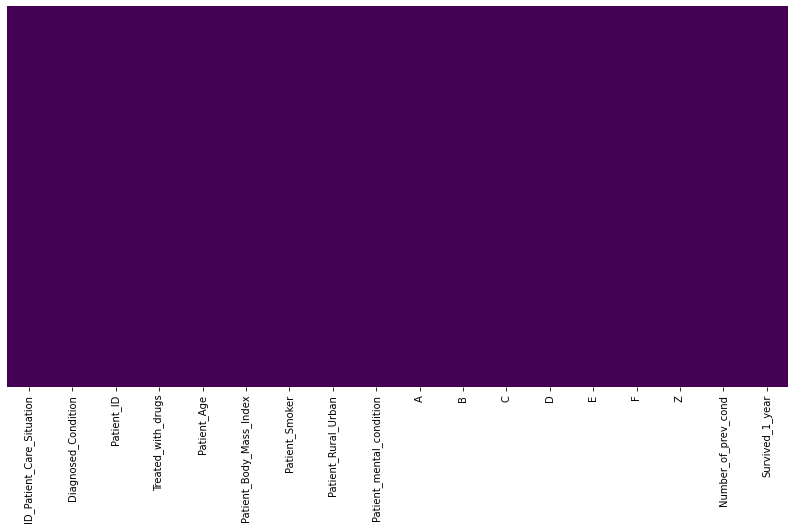

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(pharma_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Exploratory Data Analysis

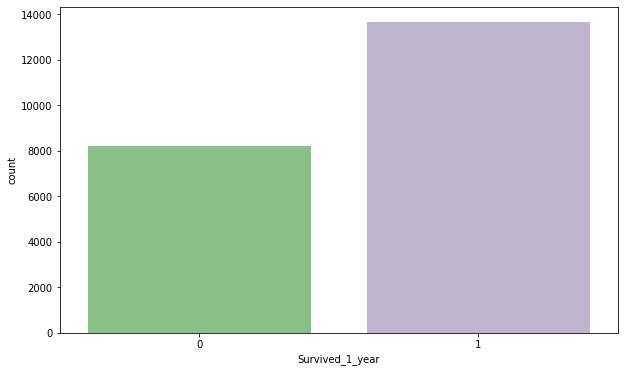

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',data= pharma_data,palette='Accent')

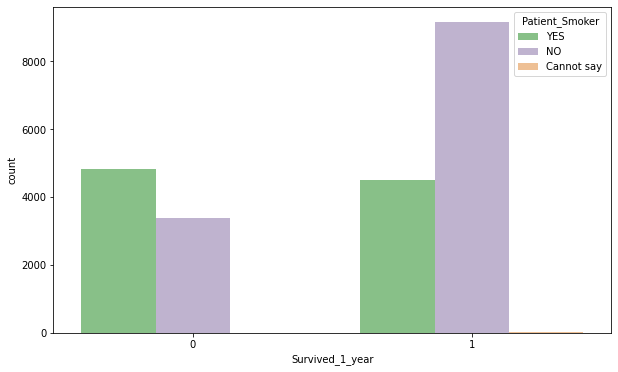

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',hue='Patient_Smoker',data= pharma_data,palette='Accent')

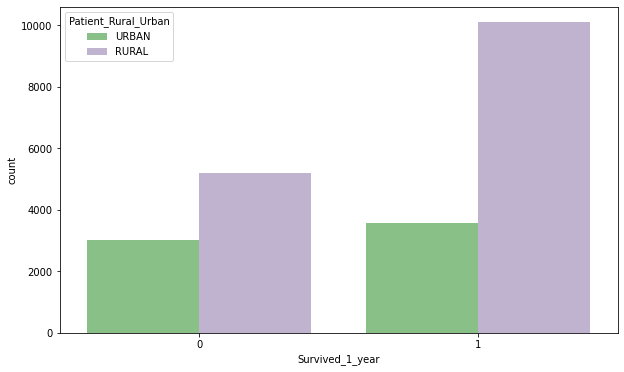

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',hue='Patient_Rural_Urban',data= pharma_data,palette='Accent')

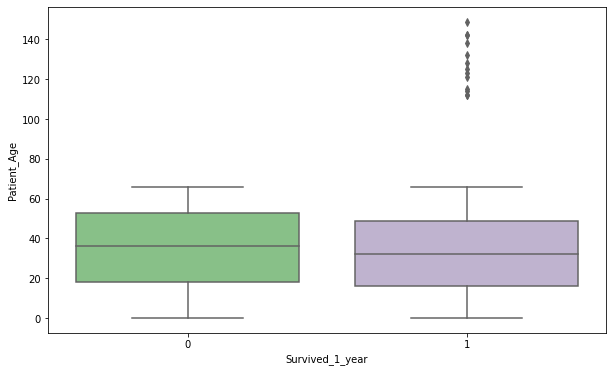

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived_1_year',y='Patient_Age',data=pharma_data,palette='Accent')

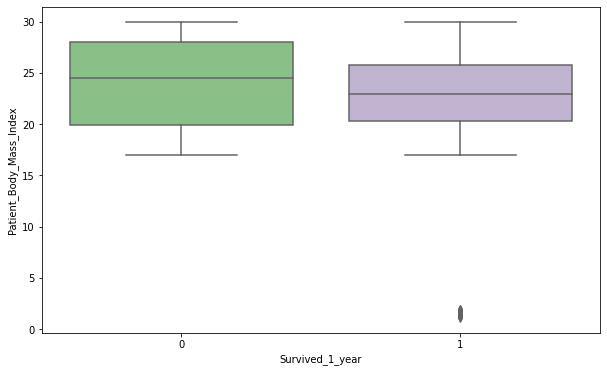

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived_1_year',y='Patient_Body_Mass_Index',data=pharma_data,palette='Accent')

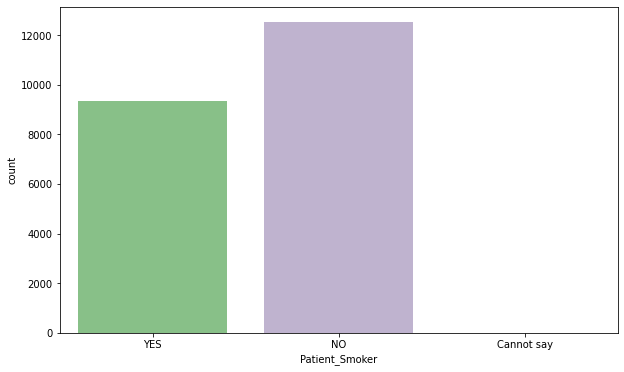

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Patient_Smoker',data=pharma_data,palette='Accent')

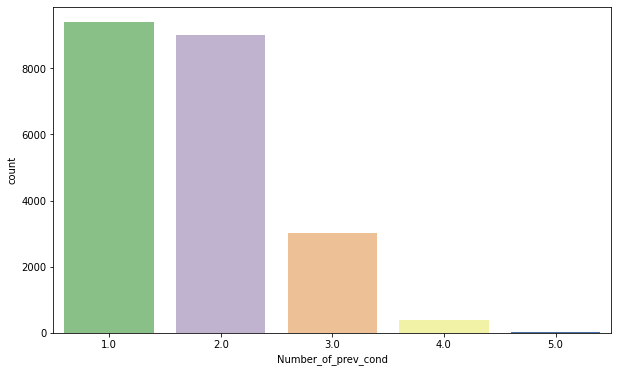

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Number_of_prev_cond',data=pharma_data,palette='Accent')

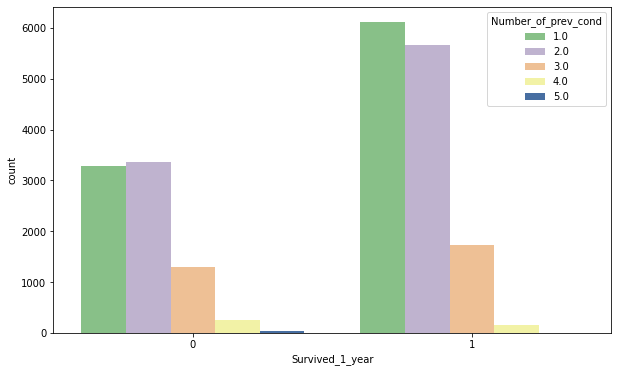

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',hue='Number_of_prev_cond',data= pharma_data,palette='Accent')

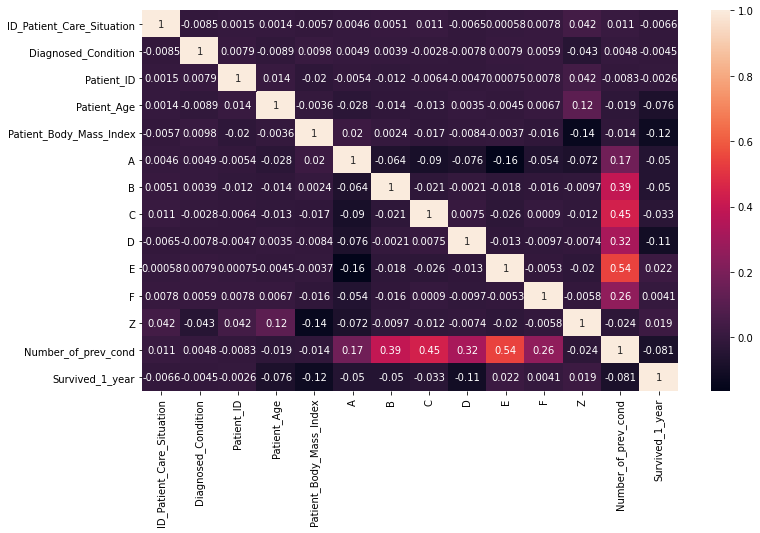

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(pharma_data.corr(), annot = True)

# Converting Categorical Features

In [ ]:
pharma_data.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

In [ ]:
pharma_data = pd.concat([pharma_data,pd.get_dummies(pharma_data['Patient_Smoker'],prefix='d',drop_first=True)],axis=1)

In [ ]:
pharma_data = pd.concat([pharma_data,pd.get_dummies(pharma_data['Patient_Rural_Urban'],prefix='d')],axis=1)

In [ ]:
pharma_data = pd.concat([pharma_data,pd.get_dummies(pharma_data['Patient_mental_condition'],prefix='d')],axis=1)

In [ ]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,d_NO,d_YES,d_RURAL,d_URBAN,d_Stable
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,1,1
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0,1
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,1,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,1,0,1


# Handling Treated_with_drugs column

In [ ]:
#convert to category dtype
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].astype('category')

In [ ]:
pharma_data.dtypes

ID_Patient_Care_Situation       int64
Diagnosed_Condition             int64
Patient_ID                      int64
Treated_with_drugs           category
Patient_Age                     int64
Patient_Body_Mass_Index       float64
Patient_Smoker                 object
Patient_Rural_Urban            object
Patient_mental_condition       object
A                             float64
B                             float64
C                             float64
D                             float64
E                             float64
F                             float64
Z                             float64
Number_of_prev_cond           float64
Survived_1_year                 int64
d_NO                            uint8
d_YES                           uint8
d_RURAL                         uint8
d_URBAN                         uint8
d_Stable                        uint8
dtype: object

In [ ]:
#use .cat.codes to create new colums with encoded value
pharma_data['Treated_with_drugs_cat'] = pharma_data['Treated_with_drugs'].cat.codes

In [ ]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,d_NO,d_YES,d_RURAL,d_URBAN,d_Stable,Treated_with_drugs_cat
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,1,1,31
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,0,1,16
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0,1,31
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,1,1,0
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,1,0,1,31


In [ ]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year', 'd_NO', 'd_YES', 'd_RURAL', 'd_URBAN', 'd_Stable',
       'Treated_with_drugs_cat'],
      dtype='object')

In [ ]:
pharma_data.shape

(21862, 24)

In [ ]:
X = pharma_data.drop(['Survived_1_year','Patient_mental_condition','Patient_Rural_Urban','Patient_Smoker','Treated_with_drugs'],axis=1)

y = pharma_data['Survived_1_year']

In [ ]:
X.shape

(21862, 19)

# Train - Test Split

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [ ]:
print('X_train:,y_train:',X_train.shape,y_train.shape)

X_train:,y_train: (17489, 19) (17489,)


In [ ]:
print('X_test:,y_test:',X_test.shape,y_test.shape)

X_test:,y_test: (4373, 19) (4373,)


# Model Building

# XGBOOST Model



In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=600, learning_rate=0.05, random_state=0)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred_xgb = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1591
           1       0.86      0.87      0.87      2782

    accuracy                           0.83      4373
   macro avg       0.82      0.81      0.81      4373
weighted avg       0.83      0.83      0.83      4373



In [ ]:
print(confusion_matrix(y_test,pred_xgb))

[[1189  402]
 [ 351 2431]]


In [ ]:
print(accuracy_score(y_test,pred_xgb))

0.8278069974845643


In [ ]:
print(f1_score(y_test,pred_xgb))

0.8658949243098842


# XGBOOST Model no. 1 Tuning

In [ ]:
estimator = XGBClassifier(random_state=0)

In [ ]:
parameters = {
    'max_depth': [2, 6, 8, 10],
    'n_estimators': [300, 600, 800],
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'f1',
    cv = 5,
    verbose=True
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 42.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [2, 6, 8, 10],
                         'n_estimators': [300, 600, 800]},
    

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 600}

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred_grid = grid_search.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_grid))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1591
           1       0.86      0.88      0.87      2782

    accuracy                           0.83      4373
   macro avg       0.82      0.82      0.82      4373
weighted avg       0.83      0.83      0.83      4373



In [ ]:
print(confusion_matrix(y_test,pred_grid))

[[1201  390]
 [ 339 2443]]


In [ ]:
print(accuracy_score(y_test,pred_grid))

0.8332952206723073


In [ ]:
print(f1_score(y_test,pred_grid))

0.8701691896705254


# XGBOOST Model no.2


In [ ]:
xgb1 = XGBClassifier(random_state=0)

In [ ]:
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred_xgb1 = xgb1.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred_xgb1))

[[1132  459]
 [ 318 2464]]


In [ ]:
print(classification_report(y_test,pred_xgb1))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1591
           1       0.84      0.89      0.86      2782

    accuracy                           0.82      4373
   macro avg       0.81      0.80      0.80      4373
weighted avg       0.82      0.82      0.82      4373



In [ ]:
print(accuracy_score(y_test,pred_xgb1))

0.8223187742968214


In [ ]:
print(f1_score(y_test,pred_xgb1))

0.8638036809815951


# XGBOOST Model no. 2 Tuning

In [ ]:
estimator1 = XGBClassifier(random_state=0)

In [ ]:
parameters1 = {
    'max_depth': [2, 3, 6, 8],
    'n_estimators': [300,600,800],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma':[0.1, 0.01, 0.5, 1]
}

In [ ]:
grid_search1 = GridSearchCV(
    estimator=estimator1,
    param_grid=parameters1,
    scoring = 'f1',
    cv = 5,
    verbose=True
)

In [ ]:
grid_search1.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 118.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.1, 0.01, 0.5, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [2, 3, 6, 8],
         

In [ ]:
grid_search1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
grid_search1.best_params_

{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 800}

In [ ]:
grid_search1.best_score_

0.8674241998643113

In [ ]:
pred_gridcv2 = grid_search1.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_gridcv2))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1591
           1       0.86      0.88      0.87      2782

    accuracy                           0.83      4373
   macro avg       0.82      0.82      0.82      4373
weighted avg       0.83      0.83      0.83      4373



In [ ]:
print(confusion_matrix(y_test,pred_gridcv2))

[[1196  395]
 [ 330 2452]]


In [ ]:
print(accuracy_score(y_test,pred_gridcv2))

0.8342099245369312


In [ ]:
print(f1_score(y_test,pred_gridcv2))

0.8712027003020075


# XGBOOST Model no. 3
# My Final Model

In [ ]:
## Hyper Parameter Optimization

params ={
 "n_estimators": [300,600,800,1000],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
Xgb_classifier = XGBClassifier(random_state= 0)

In [ ]:
random_search = RandomizedSearchCV(Xgb_classifier,param_distributions=params,
                                   n_iter=5,scoring='f1',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.4min finished



 Time taken: 0 hours 4 minutes and 33.23 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 300}

In [ ]:
random_search.best_score_

0.8668858624534117

In [ ]:
class_1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score=cross_val_score(class_1,X,y,cv=10)

In [ ]:
score

array([0.83996342, 0.83767718, 0.82982617, 0.82570906, 0.82113449,
       0.82342177, 0.83485819, 0.83668801, 0.81290027, 0.84537969])

In [ ]:
score.mean()

0.8307558261389036

# Model 4

In [ ]:
parameters1 = {
    'max_depth': [2, 3, 6, 8],
    'n_estimators': [300,600,800],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma':[0.1, 0.01, 0.5, 1]
}

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
Xgb_classifier101 = XGBClassifier(random_state= 0)

In [ ]:
random_search101 = RandomizedSearchCV(Xgb_classifier101,param_distributions=parameters1,
                                   n_iter=5,scoring='f1',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search101.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.1min finished



 Time taken: 0 hours 3 minutes and 17.11 seconds.


In [ ]:
random_search101.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search101.best_params_

{'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300}

In [ ]:
random_search101.best_score_

0.8645750903093152

In [ ]:
pp = random_search101.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test,pp))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1591
           1       0.86      0.88      0.87      2782

    accuracy                           0.83      4373
   macro avg       0.82      0.82      0.82      4373
weighted avg       0.83      0.83      0.83      4373



In [ ]:
print(confusion_matrix(y_test,pp))

[[1195  396]
 [ 332 2450]]


In [ ]:
print(accuracy_score(y_test,pp))

0.8335238966384633


In [ ]:
print(f1_score(y_test,pp))

0.8706467661691543


# Model 5

In [ ]:
clf = XGBClassifier()

In [ ]:
param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0.01, 0.1,0.05, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [300, 600, 800, 1000, 1200]}

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
random_search201 = RandomizedSearchCV(clf,param_distributions=param_grid,n_iter=5,scoring='f1',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search201.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.3min finished



 Time taken: 0 hours 3 minutes and 30.86 seconds.


In [ ]:
random_search201.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.01,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1.0, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.9, verbosity=1)

In [ ]:
random_search201.best_params_

{'colsample_bylevel': 0.8,
 'colsample_bytree': 0.4,
 'gamma': 0.01,
 'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 1.0,
 'n_estimators': 1000,
 'reg_lambda': 1.0,
 'silent': False,
 'subsample': 0.9}

In [ ]:
random_search201.best_score_

0.8657163251904645

In [ ]:
p_201 = random_search201.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test,p_201))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1591
           1       0.85      0.89      0.87      2782

    accuracy                           0.83      4373
   macro avg       0.82      0.81      0.82      4373
weighted avg       0.83      0.83      0.83      4373



In [ ]:
print(confusion_matrix(y_test,p_201))

[[1152  439]
 [ 293 2489]]


In [ ]:
print(accuracy_score(y_test,p_201))

0.8326091927738395


In [ ]:
print(f1_score(y_test,p_201))

0.8718038528896672


# The new Data for Valdition and for Submissions

In [ ]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [ ]:
test_new.shape

(9303, 17)

In [ ]:
test_new.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
dtype: object

In [ ]:
test_new['Patient_Smoker'].value_counts()

NO     5333
YES    3970
Name: Patient_Smoker, dtype: int64

# Data Preprocessing

In [ ]:
test_new=pd.concat([test_new,pd.get_dummies(test_new['Patient_Smoker'],prefix='d')],axis=1)

In [ ]:
test_new['Patient_Rural_Urban'].value_counts()

RURAL    6502
URBAN    2801
Name: Patient_Rural_Urban, dtype: int64

In [ ]:
test_new=pd.concat([test_new,pd.get_dummies(test_new['Patient_Rural_Urban'],prefix='d')],axis=1)

In [ ]:
test_new['Patient_mental_condition'].value_counts()

Stable    9303
Name: Patient_mental_condition, dtype: int64

In [ ]:
test_new = pd.concat([test_new,pd.get_dummies(test_new['Patient_mental_condition'],prefix='d')],axis=1)

In [ ]:
#convert to numeric
#convert to category dtype
test_new['Treated_with_drugs'] = test_new['Treated_with_drugs'].astype('category')
test_new.dtypes

ID_Patient_Care_Situation       int64
Diagnosed_Condition             int64
Patient_ID                      int64
Treated_with_drugs           category
Patient_Age                     int64
Patient_Body_Mass_Index       float64
Patient_Smoker                 object
Patient_Rural_Urban            object
Patient_mental_condition       object
A                             float64
B                             float64
C                             float64
D                             float64
E                             float64
F                             float64
Z                             float64
Number_of_prev_cond           float64
d_NO                            uint8
d_YES                           uint8
d_RURAL                         uint8
d_URBAN                         uint8
d_Stable                        uint8
dtype: object

In [ ]:
#use .cat.codes to create new colums with encoded value
test_new['Treated_with_drugs_cat'] = test_new['Treated_with_drugs'].cat.codes
test_new.head(5)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,d_NO,d_YES,d_RURAL,d_URBAN,d_Stable,Treated_with_drugs_cat
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,24
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,1,1,31
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,29
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1,0,0,1,1,31
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1,24


In [ ]:
test_new=test_new.drop(['Patient_mental_condition','Patient_Rural_Urban','Patient_Smoker','Treated_with_drugs'],axis=1)

In [ ]:
test_new.shape

(9303, 19)

In [ ]:
test_new.head(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,d_NO,d_YES,d_RURAL,d_URBAN,d_Stable,Treated_with_drugs_cat
0,19150,40,3709,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,24
1,23216,52,986,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,1,1,31
2,11890,50,11821,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,29
3,7149,32,3292,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1,0,0,1,1,31
4,22845,20,9959,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1,24
5,28169,9,2508,40,27.085641,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,1
6,5672,4,5467,3,21.248985,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1,31
7,2325,9,7725,35,18.428610,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,1,24
8,31840,24,122,23,19.061391,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1,31
9,12699,30,11066,3,23.265954,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1,0,0,1,1,31


# Predictions

# Submission 1

In [ ]:
predictions_grid= grid_search.best_estimator_.predict(test_new)

In [ ]:
predictions_grid

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions_grid)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('Predictions_101.csv')         
files.download('Predictions_101.csv')'''

'# To create Dataframe of predicted value with particular respective index\nres = pd.DataFrame(predictions_grid)\nres.index = test_new.index # its important for comparison\nres.columns = ["prediction"]\n\n# To download the csv file locally\nfrom google.colab import files\nres.to_csv(\'Predictions_101.csv\')         \nfiles.download(\'Predictions_101.csv\')'

# Submission 2

In [ ]:
predictions_gridcv2 = grid_search1.best_estimator_.predict(test_new)

In [ ]:
predictions_gridcv2

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions_gridcv2)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('Predictions_Final.csv')         
files.download('Predictions_Final.csv')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Submission 3 (FINAL)




In [ ]:
soh = random_search.best_estimator_.predict(test_new)

In [ ]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(soh)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('Predictions_soh.csv')         
files.download('Predictions_soh.csv')'''

# Submission 4

In [ ]:
pred_new_201 = random_search201.best_estimator_.predict(test_new)

In [ ]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(pred_new_201)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('Predictions_201.csv')         
files.download('Predictions_201.csv')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EXTRA


# Feature Selection using XGBOOST


In [ ]:
print("Feature Importances : ", grid_search.best_estimator_.feature_importances_)

Feature Importances :  [0.00556993 0.06771442 0.00495795 0.05180325 0.06580126 0.08498101
 0.08137139 0.04894823 0.04891387 0.08330958 0.         0.
 0.08855908 0.17063951 0.06612716 0.05431019 0.         0.
 0.07699327]


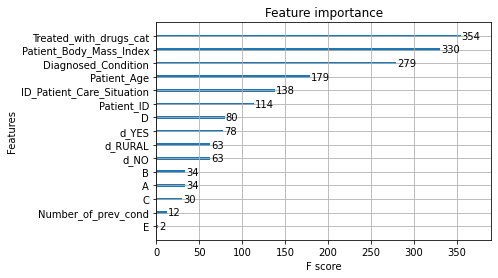

In [ ]:
# plot feature importance

plot_importance(grid_search.best_estimator_)
plt.show()

In [ ]:
selection = SelectFromModel(grid_search.best_estimator_)
selection.fit(X_train, y_train)

# Transform the train and test features
select_x_train1 = selection.transform(X_train)
select_x_test1 = selection.transform(X_test) 

# train model
selection_model = XGBClassifier(random_state=0, learning_rate=0.01,n_estimators=600)

selection_model.fit(select_x_train1, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
sfm_predict= selection_model.predict(select_x_test1)

In [ ]:
print(classification_report(y_test,sfm_predict))

              precision    recall  f1-score   support

           0       0.76      0.69      0.73      1591
           1       0.83      0.87      0.85      2782

    accuracy                           0.81      4373
   macro avg       0.80      0.78      0.79      4373
weighted avg       0.81      0.81      0.81      4373



In [ ]:
print(confusion_matrix(y_test,sfm_predict))

[[1105  486]
 [ 349 2433]]


In [ ]:
print(accuracy_score(y_test,sfm_predict))

0.8090555682597759


In [ ]:
print(f1_score(y_test,sfm_predict))

0.8535344676372566


In [ ]:
print("Feature Importances : ", grid_search1.best_estimator_.feature_importances_)

Feature Importances :  [0.00578294 0.07263641 0.00499054 0.05517651 0.07294892 0.08301148
 0.07818671 0.05257932 0.05124001 0.07506482 0.         0.
 0.08622433 0.15618886 0.06914677 0.05489027 0.         0.
 0.08193208]


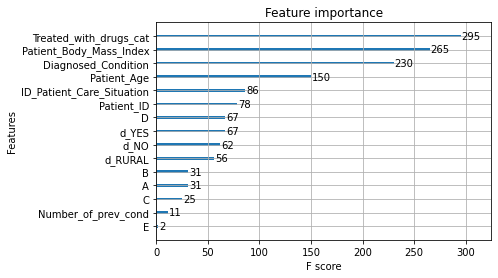

In [ ]:
# plot feature importance

plot_importance(grid_search1.best_estimator_)
plt.show()